In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data (update the path to your train_data.xlsx file)
data_path = "train_data.xlsx"
data = pd.read_excel(data_path)

In [ ]:
# Initial exploration
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
data.info()
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Head:
   customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  \
0       720

In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
        customer_id               transaction_date    cibil_score  \
count  1.137050e+05                         113705  113705.000000   
mean   4.359137e+07  2015-03-04 22:24:20.769535232     684.398707   
min    3.630090e+05            2014-01-01 00:00:00     660.000000   
25%    2.509597e+07            2014-08-01 00:00:00     665.000000   
50%    4.504932e+07            2015-04-01 00:00:00     680.000000   
75%    6.134344e+07            2015-10-01 00:00:00     695.000000   
max    7.615383e+07            2016-03-01 00:00:00     845.000000   
std    2.016104e+07                            NaN      22.871241   

       total_no_of_acc    annual_inc       int_rate      loan_amnt  \
count    113705.000000  1.137050e+05  113705.000000  113705.000000   
mean          0.272934  7.138822e+04      15.955469   15158.144980   
min           0.000000  0.000000e+00      12.050000    1000.000000   
25%           0.000000  4.300000e+04      13.330000    8000.000000   
50%    

<ipython-input-5-dad492d44a25>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='loan_status', palette='viridis')


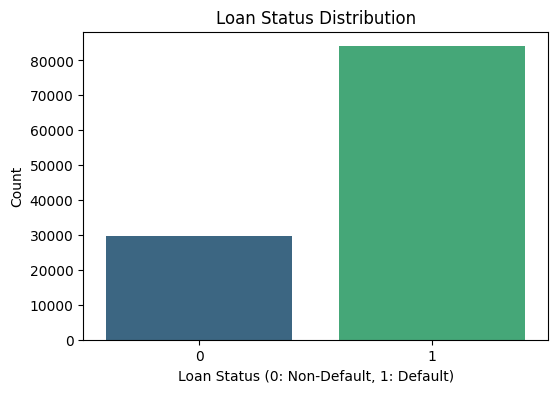

In [ ]:
# Visualizations
# 1. Loan status distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='loan_status', palette='viridis')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (0: Non-Default, 1: Default)')
plt.ylabel('Count')
plt.show()

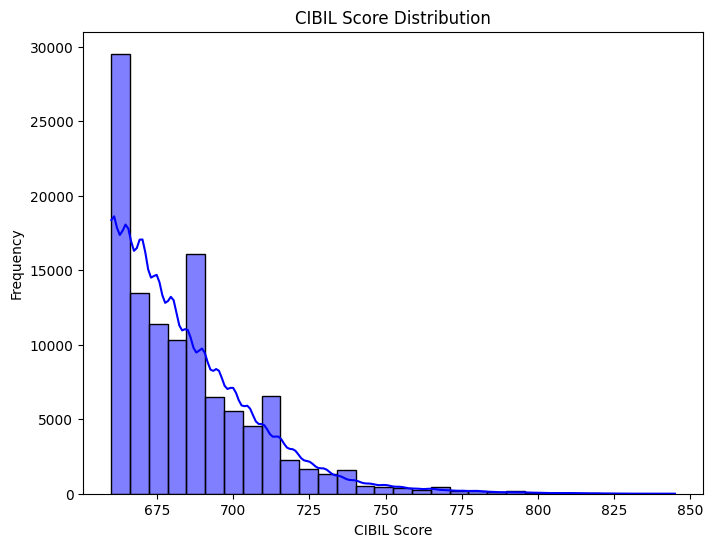

In [ ]:
# 2. CIBIL score distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['cibil_score'].dropna(), kde=True, bins=30, color='blue')
plt.title('CIBIL Score Distribution')
plt.xlabel('CIBIL Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-7-71e3dbed8d10>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y='loan_amnt', palette='viridis')


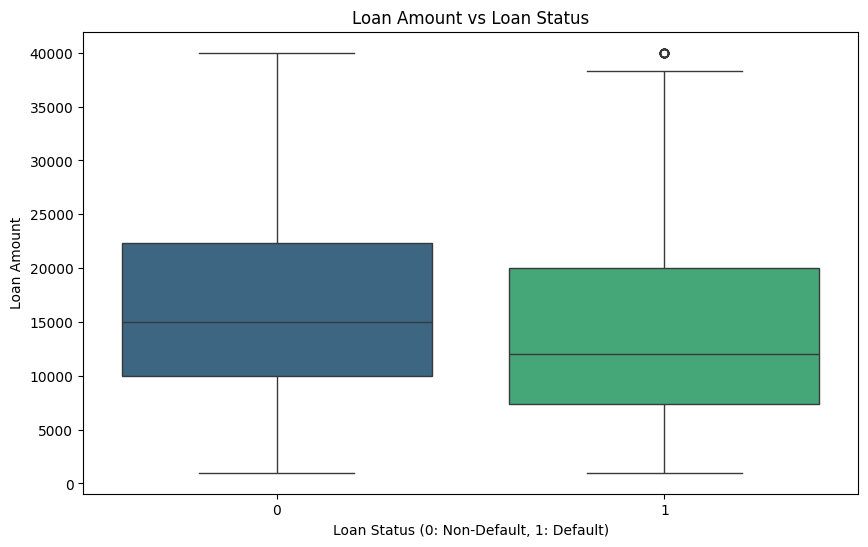

In [ ]:
# 3. Loan amount vs Loan status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='loan_status', y='loan_amnt', palette='viridis')
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status (0: Non-Default, 1: Default)')
plt.ylabel('Loan Amount')
plt.show()

<ipython-input-8-06418316fc38>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y='annual_inc', palette='plasma')


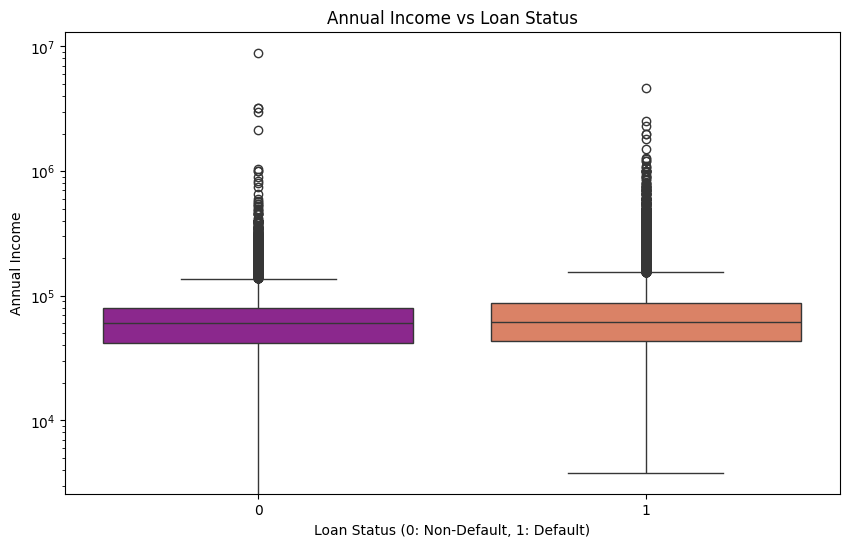

In [ ]:
# 4. Annual income vs Loan status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='loan_status', y='annual_inc', palette='plasma')
plt.title('Annual Income vs Loan Status')
plt.xlabel('Loan Status (0: Non-Default, 1: Default)')
plt.ylabel('Annual Income')
plt.yscale('log')  # Log scale for better visualization
plt.show()

<ipython-input-9-0e5f977346cd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='coolwarm')


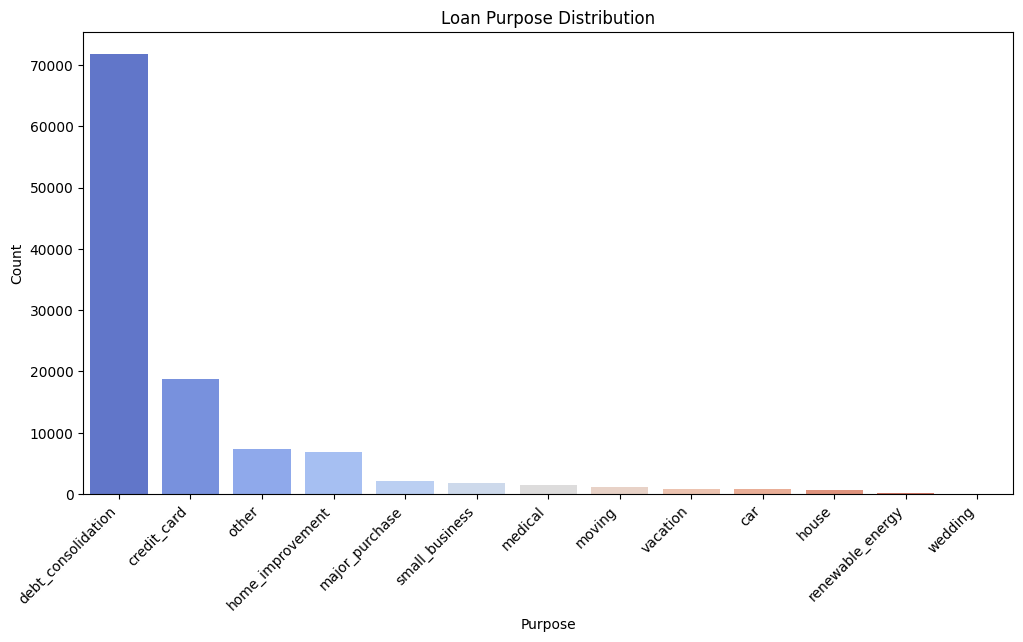

In [ ]:
# 5. Purpose distribution
plt.figure(figsize=(12, 6))
purpose_counts = data['purpose'].value_counts()
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='coolwarm')
plt.title('Loan Purpose Distribution')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

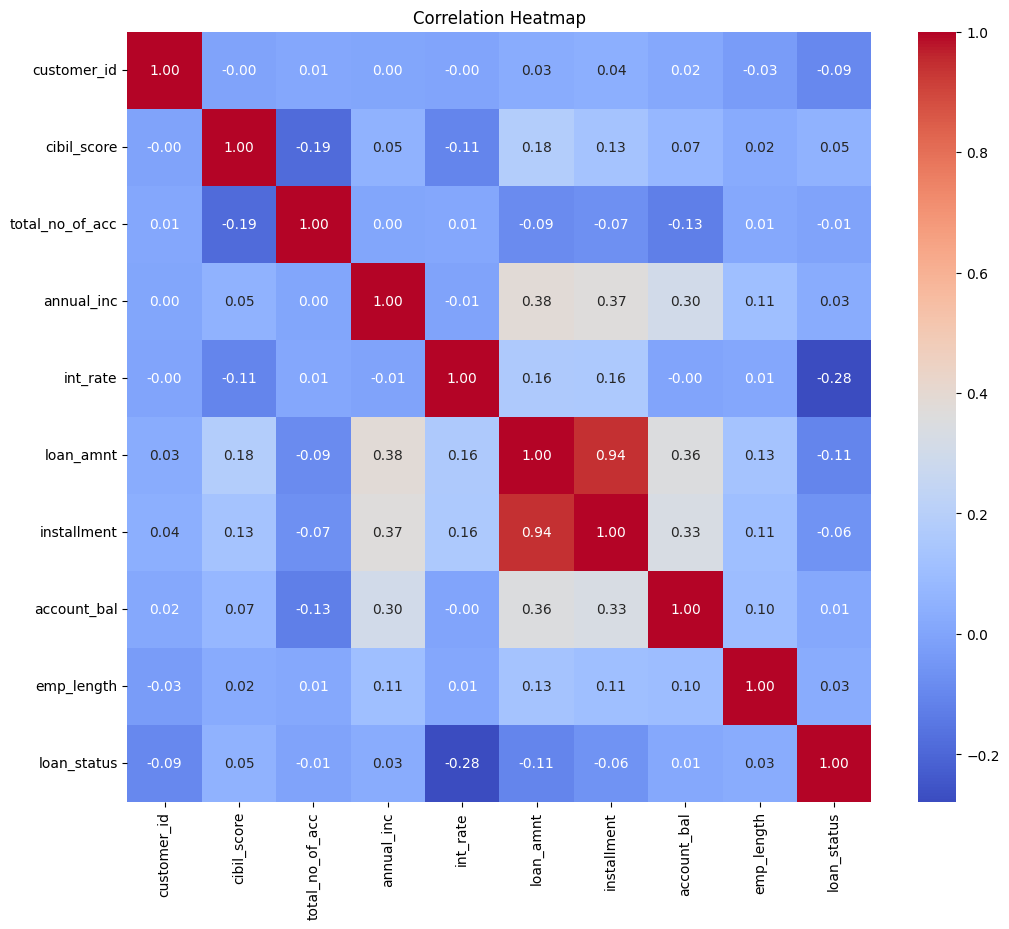

In [ ]:
# 6. Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib

class LoanDefaultModel:
    def __init__(self, model_type="random_forest"):
        if model_type == "random_forest":
            self.model = RandomForestClassifier(random_state=42)
        elif model_type == "logistic_regression":
            self.model = LogisticRegression(max_iter=1000)
        else:
            raise ValueError("Unsupported model type")

    def load_data(self, path):
        self.data = pd.read_excel(path)

    def preprocess(self):
        # Example preprocessing: handle missing values, encode categorical variables, etc.
        # Instead of dropping rows with NA, fill NA for issue_d column
        if 'issue_d' in self.data.columns:
            self.data['issue_d'] = self.data['issue_d'].fillna(self.data['issue_d'].mode()[0])
            self.data['issue_d'] = pd.to_datetime(self.data['issue_d'])
            self.data['issue_d_year'] = self.data['issue_d'].dt.year
            self.data['issue_d_month'] = self.data['issue_d'].dt.month
            self.data['issue_d_day'] = self.data['issue_d'].dt.day
            # Remove the original 'issue_d' column only once
            self.data = self.data.drop('issue_d', axis=1) # This line drops the 'issue_d' column
        else:
            print("Warning: 'issue_d' column not found in the DataFrame. Skipping preprocessing for this column.")

        # Removed the redundant drop statement for 'issue_d' here

        # One-hot encode categorical features (excluding date columns)
        categorical_cols = self.data.select_dtypes(include=['object']).columns
        self.data = pd.get_dummies(self.data, columns=categorical_cols, drop_first=True)

        # Convert datetime columns to numerical features (ordinal encoding for dates)
        for col in self.data.select_dtypes(include=['datetime64']).columns:
            self.data[col] = self.data[col].apply(lambda date: date.toordinal())

        # Split features and target
        self.X = self.data.drop("loan_status", axis=1)
        self.y = self.data["loan_status"]
        print("Shape of X: \n", self.X.head(5))

        # Train-test split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

    def train(self):
        self.model.fit(self.X_train, self.y_train)

    def test(self):
        y_pred = self.model.predict(self.X_test)
        print("Classification Report:")
        print(classification_report(self.y_test, y_pred))
        print(f"Accuracy: {accuracy_score(self.y_test, y_pred):.2f}")

    def predict(self, input_data):
        input_df = pd.DataFrame([input_data])
        prediction = self.model.predict(input_df)
        return prediction

    def save_model(self, filename):
        joblib.dump(self.model, filename)

    def load_model(self, filename):
        self.model = joblib.load(filename)

if __name__ == "__main__":
    # Initialize and run the model pipeline
    model = LoanDefaultModel(model_type="random_forest")
    model.load_data("train_data.xlsx")
    model.preprocess()
    model.train()
    model.test()
    model.save_model("loan_default_model.pkl")


Shape of X: 
    customer_id  transaction_date  cibil_score  total_no_of_acc  annual_inc  \
0     10608026            735234          665                9     70000.0   
1     10235120            735234          660                8     65000.0   
2     10705805            735234          660                7     73000.0   
3     11044991            735234          690                5    118000.0   
4     10161054            735234          665                5     63000.0   

   int_rate  loan_amnt  installment  account_bal  emp_length  ...  \
0     16.24       7200       253.99         4648          11  ...   
1     23.40       6000       233.52        14051          11  ...   
2     17.57       8000       287.50        14885          11  ...   
3     12.85      10000       336.22         7542           2  ...   
4     14.98      10000       237.80         6318          11  ...   

   purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  \
0            False     